In [2]:
from sklearn.datasets import fetch_mldata
m = fetch_mldata('MNIST original')
X, y = m["data"], m["target"]

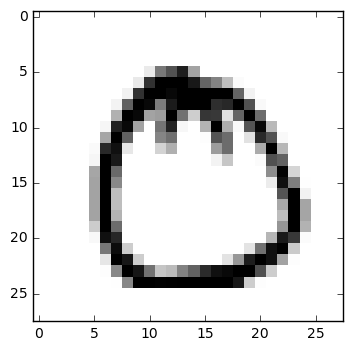

In [3]:
import matplotlib
import matplotlib.pyplot as plt
r=X[1000]
r=r.reshape(28,28)
plt.imshow(r, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.show()

In [4]:
import numpy as np
print(X.shape)
print(y.shape)
shuffle_index = np.random.permutation(len(X))
test_train_ratio=0.2
trainsize=(int)(len(X)*(1-test_train_ratio))
Xtrain, Xtest=X[shuffle_index[:trainsize]], X[shuffle_index[trainsize:]]
ytrain, ytest=y[shuffle_index[:trainsize]], y[shuffle_index[trainsize:]]
ytrain5, ytest5=(ytrain==5),(ytest==5)

(70000, 784)
(70000,)


In [5]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(Xtrain, ytrain)

preds=sgd_clf.predict(Xtrain)
(preds==ytrain).sum()

49035

In [6]:
from sklearn.model_selection import cross_val_score
res=cross_val_score(sgd_clf, Xtrain, ytrain, cv=3, scoring="accuracy")
print(res)

[ 0.8669059   0.87244871  0.87777301]


In [8]:
from sklearn.neighbors import KNeighborsClassifier

nei=KNeighborsClassifier(n_neighbors=1);
nei.fit(Xtrain,ytrain)
print(ytrain[:10])
print(nei.predict(Xtrain[:10]))

[ 9.  2.  7.  4.  8.  4.  2.  9.  7.  7.]
[ 9.  2.  7.  4.  8.  4.  2.  9.  7.  7.]


In [ ]:
res=cross_val_score(nei,Xtrain,ytrain,cv=3,scoring="accuracy")
print(res)